# Test 1 SOM on Kepler and TESS Data

The first test done on the dataset combined with the Kepler and TESS data processed with the Min Max technique. Using the dataset without under-sampling, with all the characteristics and initializing the weights of the SOM with 50% composed of Planet values ​​taken randomly, and 50% False Planets.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Added paths to import modules
sys.path.insert(0, os.path.abspath('../'))

from sklearn.model_selection import train_test_split
from simple_som.som_grid_search import SOMGridSearch
from simple_som.som import SimpleSOM
from simple_som.visualization import View
from utils.color import Color
from utils.util import print_count_nan, plot_confusion_matrix
from utils.ditance_metrics import DistanceMetrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [2]:
X_train = pd.read_csv('../data/processed_data/X_kepler_tess.csv')
y_train = pd.read_csv('../data/processed_data/y_kepler_tess.csv')
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print_count_nan(data=X_train, name='X_train')
print_count_nan(data=y_train, name='y_train')
print('X Col', X_train.columns)
print('y Col', y_train.columns)

Shape of X_train: (13798, 18)
Shape of y_train: (13798, 2)
Number of not a numbers values in X_train: 0 out of 248364: 0.00%
Number of not a numbers values in y_train: 0 out of 27596: 0.00%
X Col Index(['Unnamed: 0', 'Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [3]:
X_train = X_train.drop(columns=['Unnamed: 0'])

In [4]:
print('X Col', X_train.columns)
print('y Col', y_train.columns)

X Col Index(['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag'],
      dtype='object')
y Col Index(['Unnamed: 0', '0'], dtype='object')


In [5]:
component_names = ['Period (days)', 'Period (days) err', 'Duration (hours)',
       'Duration (hours) err', 'Depth (ppm)', 'Depth (ppm) err',
       'Planet Radius (R_Earth) err', 'Planet Radius (R_Earth)',
       'Planet Equil Temp (K)', 'Planet Insolation (Earth Flux)', 'Planet SNR',
       'Stellar Eff Temp (K)', 'Stellar Eff Temp (K) err',
       'Stellar log(g) (cm/s^2)', 'Stellar Mass (M_Sun)',
       'Stellar Mass (M_Sun) err', 'TESS Mag']

In [6]:
X_train = X_train.values
y_train = y_train.drop(columns='Unnamed: 0').values

In [7]:
TESTSET_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=TESTSET_SIZE, 
                                                    random_state=RANDOM_STATE, shuffle=True,
                                                    stratify=None)
print("Number of X_train: ", X_train.shape[0])
print("Number of X_test: ", X_test.shape[0])
print("Number of features: ", X_train.shape[1])

Number of X_train:  11038
Number of X_test:  2760
Number of features:  17


# Grid Search

In [8]:
param_grid = {
    'W': [None],
    'max_iter': [10000],
    'num_rows': [15, 20, 30],
    'num_cols': [15, 20, 30],
    'max_learning_rate': [0.8],
    'max_distance': [10],
    'distance_bmu': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'distance_nr': [DistanceMetrics.euclidean_distance, DistanceMetrics.manhattan_distance],
    'W_PLANET': [0.9],
    'W_FALSE_PLANET': [1],
    'K': [5, 7, 9]
}

In [9]:
grid_search = SOMGridSearch(param_grid=param_grid, n_jobs=4)
best_param, best_score = grid_search.fit(X_train, y_train, X_test, y_test)

print("Best param:", best_param)
print("Best accuracy:", best_score)
#################################################################################
# Best param: {'W': None, 'max_iter': 10000, 'num_rows': 30, 'num_cols': 30,
# 'max_learning_rate': 0.8, 'max_distance': 10,
# 'distance_bmu': <function DistanceMetrics.euclidean_distance at 0x7f6ebb476e80>,
# 'distance_nr': <function DistanceMetrics.manhattan_distance at 0x7f6ebb476f20>,
# 'W_PLANET': 0.9, 'W_FALSE_PLANET': 1, 'K': 9}
# Best accuracy: 0.7902173913043479

Fitting 1 folds for each of 108 candidates, totalling 108 fits
SOM training completed:  10000  | QE:    0.000003  | LR:    0.000080  | NR:    1.000000  | Time:   44.046697
SOM training completed:  10000  | QE:    0.000003  | LR:    0.000080  | NR:    1.000000  | Time:   49.336708
SOM training completed:  10000  | QE:    0.000003  | LR:    0.000080  | NR:    1.000000  | Time:   50.745131
SOM training completed:  10000  | QE:    0.000003  | LR:    0.000080  | NR:    1.000000  | Time:   51.210016
SOM training completed:  10000  | QE:    0.000003  | LR:    0.000080  | NR:    1.000000  | Time:   43.911301
SOM training completed:  10000  | QE:    0.000003  | LR:    0.000080  | NR:    1.000000  | Time:   41.972632
SOM training completed:  10000  | QE:    0.000009  | LR:    0.000080  | NR:    1.000000  | Time:   44.239880
SOM training completed:  10000  | QE:    0.000009  | LR:    0.000080  | NR:    1.000000  | Time:   43.997837
SOM training completed:  10000  | QE:    0.000011  | LR:    0.000

In [10]:
# best_param = {}
# best_param['W'] = None
# best_param['max_iter'] = 14000
# best_param['num_rows'] = 20
# best_param['num_cols'] = 20
# best_param['max_learning_rate'] = 0.8
# best_param['max_distance'] = 5
# best_param['distance_bmu'] = DistanceMetrics.euclidean_distance
# best_param['distance_nr'] = DistanceMetrics.euclidean_distance
# best_param['W_PLANET'] = 1
# best_param['W_FALSE_PLANET'] = 1
# best_param['K'] = 5

In [11]:
W = best_param['W']
max_iter = 20000 # best_param['max_iter']
num_rows = best_param['num_rows']
num_cols = best_param['num_cols']
max_learning_rate = best_param['max_learning_rate']
max_distance = best_param['max_distance']
distance_bmu = best_param['distance_bmu']
distance_nr = best_param['distance_nr']
w_planet = best_param['W_PLANET']
w_false_planet = best_param['W_FALSE_PLANET']
K = best_param['K']

In [12]:
som = SimpleSOM(X_train=X_train, y_train=y_train, W=None, max_iter=max_iter, 
                num_rows=num_rows, num_cols=num_cols, max_learning_rate=max_learning_rate,
                max_distance=max_distance, distance_bmu=distance_bmu, distance_nr=distance_nr, 
                W_PLANET=w_planet, W_FALSE_PLANET=w_false_planet, K=K, n_jobs=4)
params = som.fit(X_data=X_train, verbose=2)

Iteration:  00001  | QE:    0.000004  | LR:    0.800000  | NR:   10.000000  | Time:    0.022124
Iteration:  01000  | QE:    0.000006  | LR:    0.760040  | NR:   10.000000  | Time:    8.623362
Iteration:  02000  | QE:    0.000001  | LR:    0.720040  | NR:   10.000000  | Time:    8.549690
Iteration:  03000  | QE:    0.000005  | LR:    0.680040  | NR:    9.000000  | Time:    8.607149
Iteration:  04000  | QE:    0.000008  | LR:    0.640040  | NR:    9.000000  | Time:    8.883953
Iteration:  05000  | QE:    0.000006  | LR:    0.600040  | NR:    8.000000  | Time:    8.297443
Iteration:  06000  | QE:    0.000002  | LR:    0.560040  | NR:    8.000000  | Time:    8.279800
Iteration:  07000  | QE:    0.000008  | LR:    0.520040  | NR:    7.000000  | Time:    8.373260
Iteration:  08000  | QE:    0.000003  | LR:    0.480040  | NR:    7.000000  | Time:    8.231878
Iteration:  09000  | QE:    0.000003  | LR:    0.440040  | NR:    6.000000  | Time:    8.201599
Iteration:  10000  | QE:    0.000002  | 

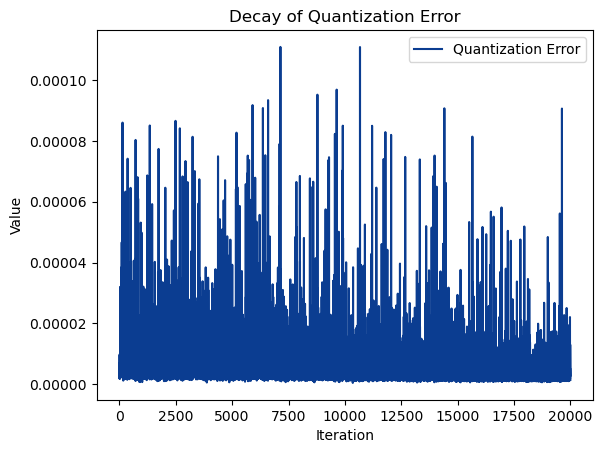

In [13]:
REDUCE = 1
plt.plot(range(max_iter//REDUCE), params['errors'][::REDUCE], 
         label='Quantization Error', color=Color.SEA.value)
plt.title('Decay of Quantization Error')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

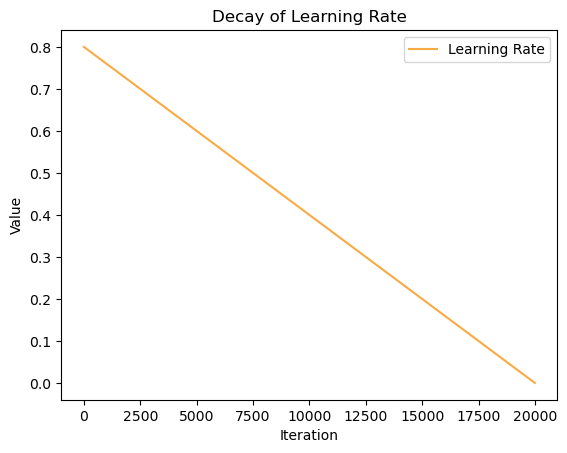

In [14]:
plt.plot(range(max_iter), params['lr'], label='Learning Rate', color=Color.SUN.value)
plt.title('Decay of Learning Rate')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

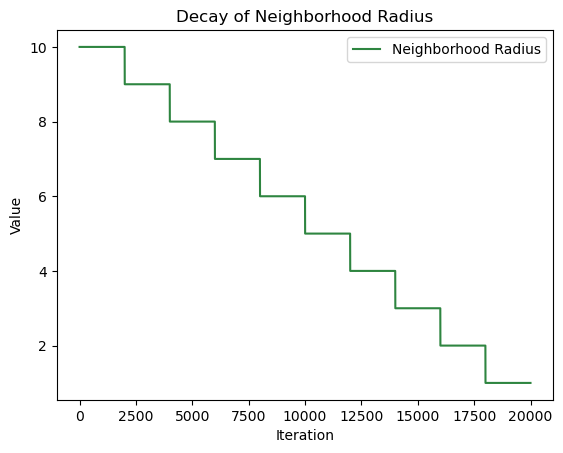

In [15]:
plt.plot(range(max_iter), params['nr'], label='Neighborhood Radius', color=Color.EARTH.value)
plt.title('Decay of Neighborhood Radius')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()

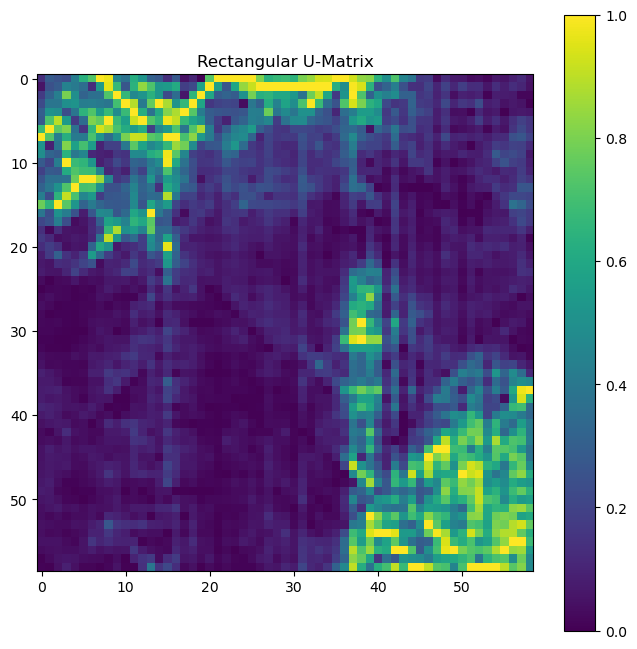

In [16]:
u_matrix_rect = View.make_u_rect(som=som)
plt.figure(figsize=(8, 8))
plt.imshow(u_matrix_rect, cmap='viridis', interpolation='none')
plt.title('Rectangular U-Matrix')
plt.colorbar()
plt.show()

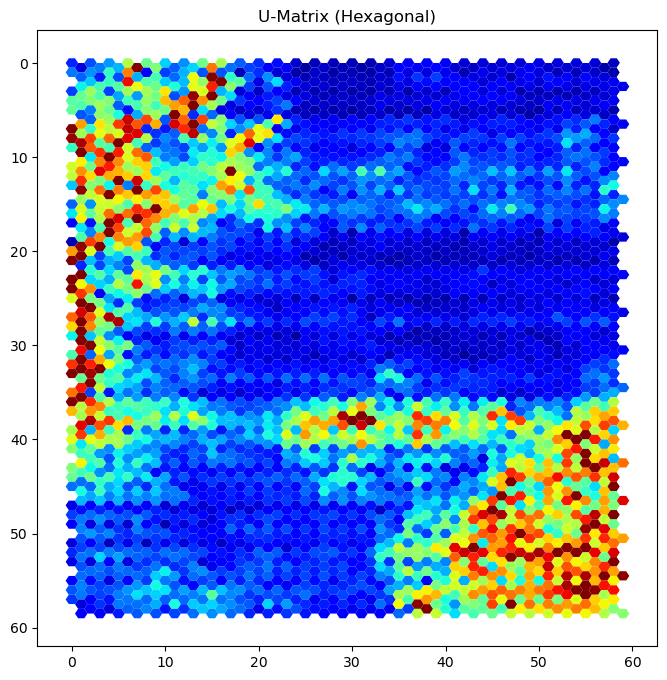

In [17]:
u_matrix_hex = View.make_u_hex(som=som)
fig, ax = plt.subplots(figsize=(8,8))
View.draw_hex_grid(som, ax, u_matrix_hex)
plt.show()

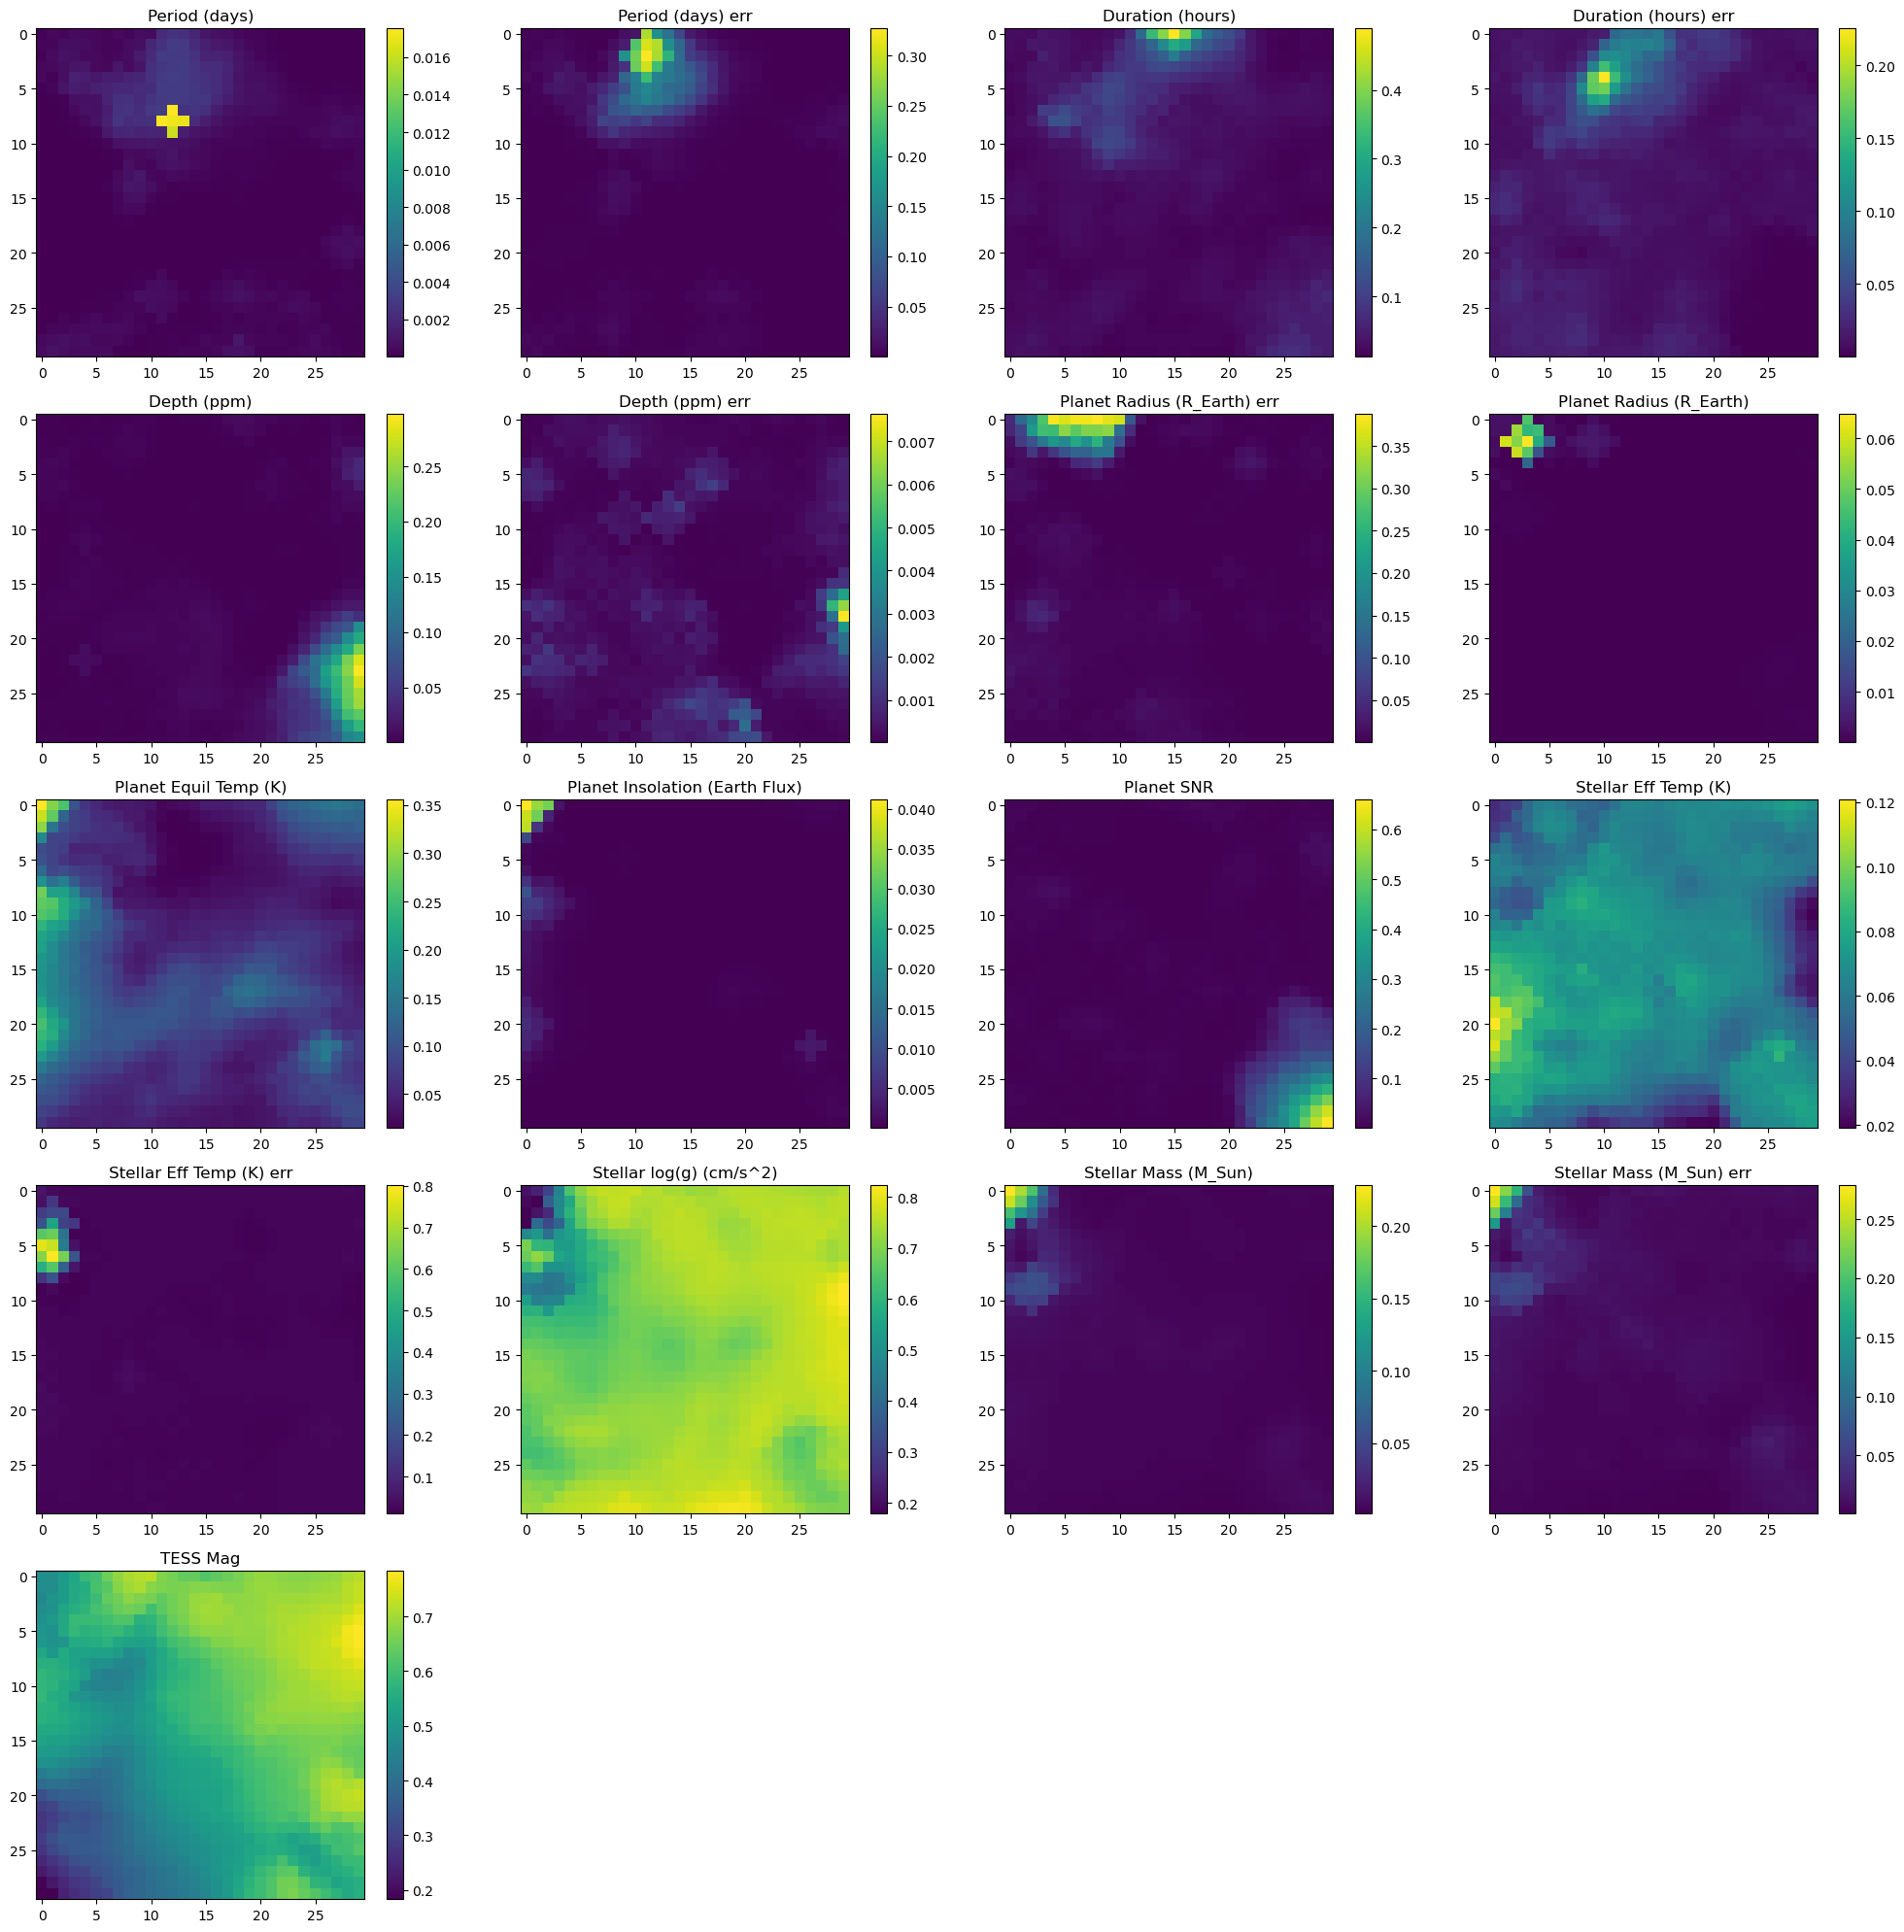

In [18]:
fig = plt.figure(figsize=(20, 20))
View.make_u_slide(component_names=component_names, som=som)
plt.show()

In [19]:
BMUs, BMU_labels = som.calculate_bmu_and_labels()
BMU_label_combinations = list(zip(BMUs, BMU_labels))
BMU_counts = som.bmu_occurrences()
coord_label = som.compute_coordinates_label()
som.print_bmu_label()

(27, 4) -> Planet:  30, False Planet:   0
(17, 17)-> Planet:  15, False Planet:   0
(5, 4)  -> Planet:   0, False Planet:  23
(29, 20)-> Planet:  21, False Planet:   0
(21, 5) -> Planet:   4, False Planet:   0
(20, 20)-> Planet:   0, False Planet:  24
(18, 11)-> Planet:  18, False Planet:   0
(20, 2) -> Planet:  14, False Planet:   0
(3, 6)  -> Planet:   5, False Planet:   0
(26, 25)-> Planet:   0, False Planet:  12
(11, 26)-> Planet:   0, False Planet:  30
(24, 19)-> Planet:  11, False Planet:   0
(18, 25)-> Planet:   0, False Planet:   7
(15, 29)-> Planet:  15, False Planet:   0
(26, 10)-> Planet:  12, False Planet:   0
(24, 13)-> Planet:  10, False Planet:   0
(26, 0) -> Planet:  24, False Planet:   0
(6, 18) -> Planet:  10, False Planet:   0
(13, 27)-> Planet:  15, False Planet:   0
(22, 28)-> Planet:   0, False Planet:  10
(22, 24)-> Planet:   0, False Planet:  11
(12, 26)-> Planet:  12, False Planet:   0
(11, 29)-> Planet:   9, False Planet:   0
(26, 17)-> Planet:   8, False Plan

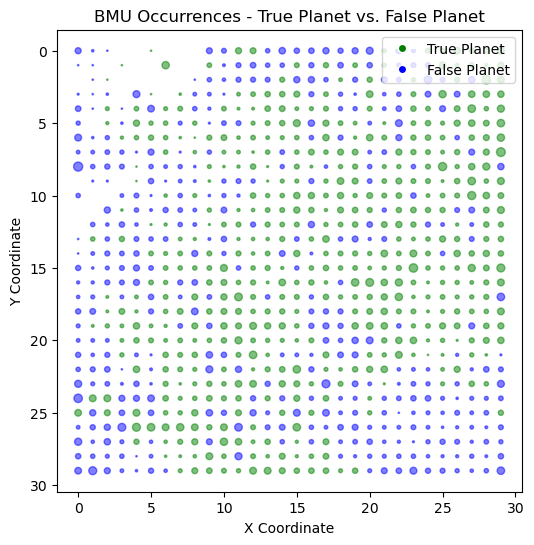

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
View.plot_bmu_occurrences_with_planet_noplanet(ax=ax, coord_label=coord_label)
plt.show()

In [21]:
map = som.collecting_labels(X_train, y_train)
label_map = som.construct_label_map(X_train, y_train)
label_map_kw = som.construct_label_map_weighed(X_train, y_train)
label_map_kcw = som.construct_label_map_occ_weighed(X_train, y_train)

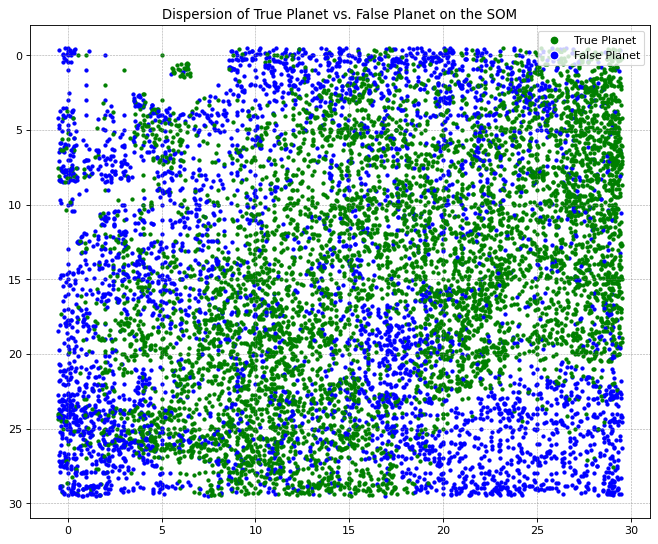

In [22]:
View.plot_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, BMU_labels=BMU_labels)

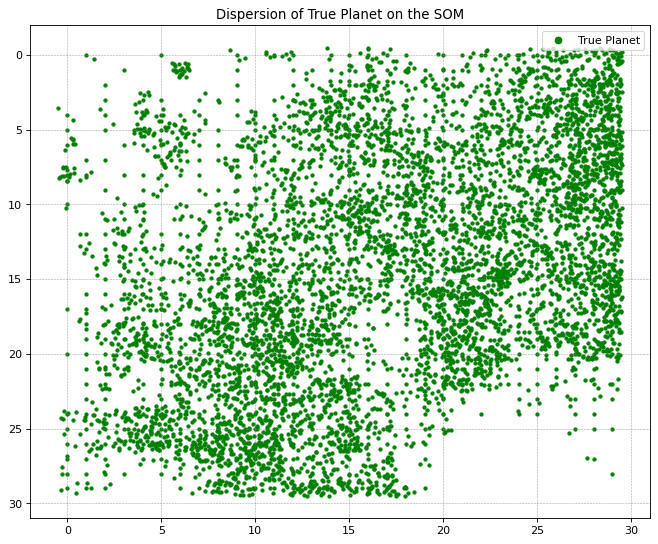

In [23]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=1)

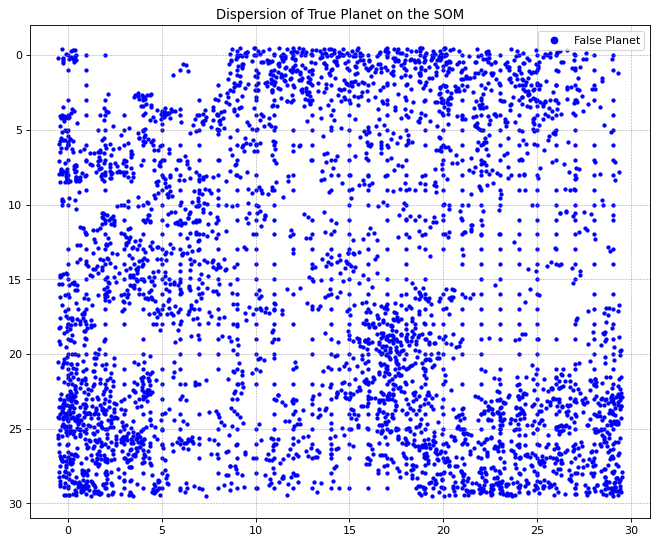

In [24]:
View.plot_class_dispersion_observation_on_som(X_train=X_train, BMUs=BMUs, 
                                              BMU_labels=BMU_labels, classes=0)

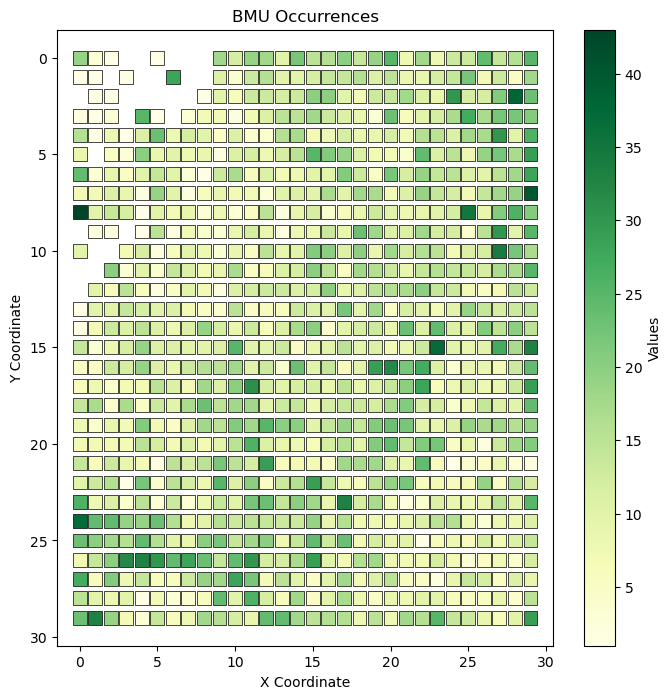

In [25]:
x_coords, y_coords, counts_occ = som.compute_occurrences_plot()

plt.figure(figsize=(8, 8))
sc = plt.scatter(x_coords, y_coords, c=counts_occ, cmap='YlGn', 
                 s=100, marker='s', edgecolors='black', linewidths=0.5)
plt.colorbar(sc, label='Values')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('BMU Occurrences')
plt.gca().invert_yaxis()
plt.show()

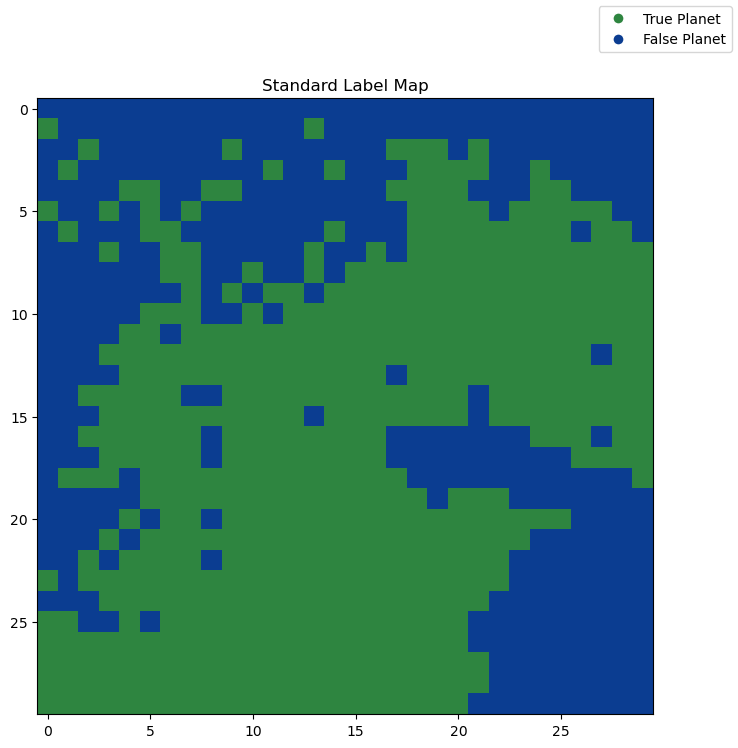

In [26]:
title = ('Standard Label Map')
View.plot_label_map(label_map=label_map, title=title)

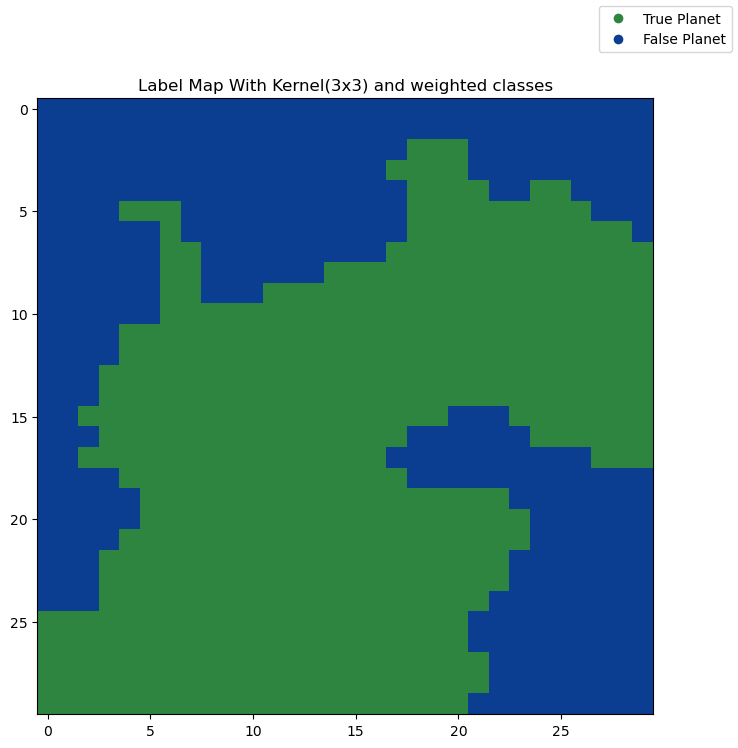

In [27]:
title = ('Label Map With Kernel(3x3) and weighted classes')
View.plot_label_map(label_map=label_map_kw, title=title)

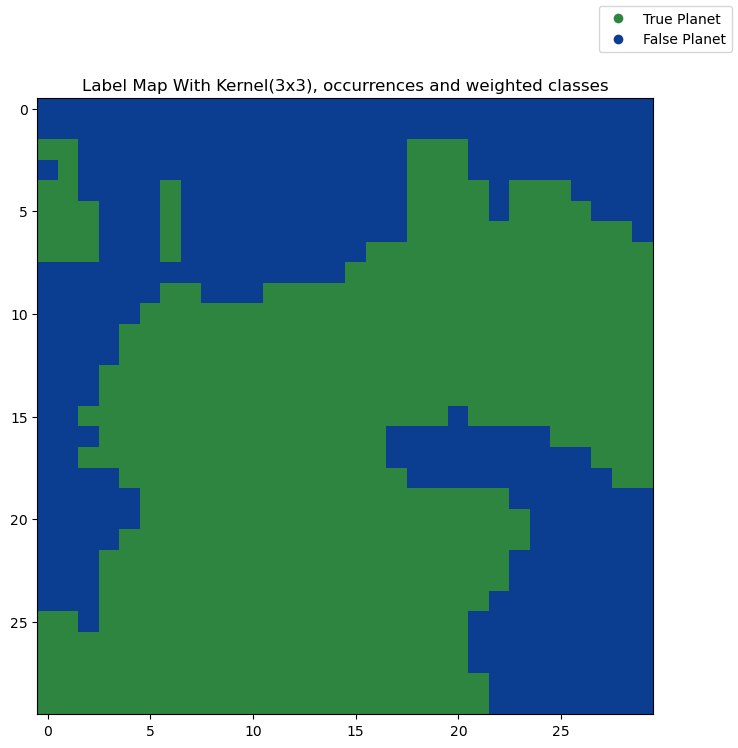

In [28]:
title = ('Label Map With Kernel(3x3), occurrences and weighted classes')
View.plot_label_map(label_map=label_map_kcw, title=title)

Accuracy: 0.7710144927536232
F1-score: 0.8248337028824835
Precision: 0.7674058793192368
Recall: 0.8915518274415818
cm:  [[ 640  451]
 [ 181 1488]]


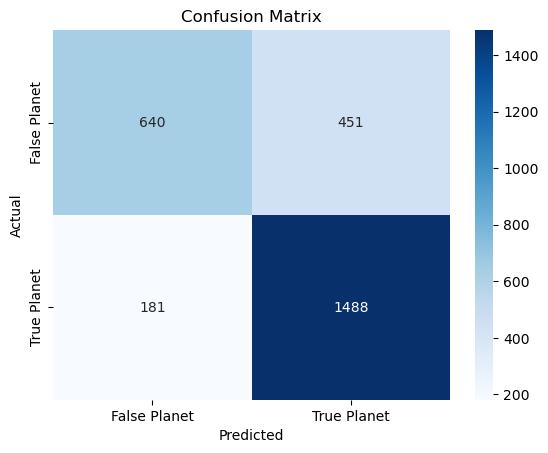

In [29]:
predicted = som.predict(X_train=X_train, y_train=y_train, X_test=X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7717391304347826
F1-score: 0.8231330713082539
Precision: 0.774432118330692
Recall: 0.8783702816057519
cm:  [[ 664  427]
 [ 203 1466]]


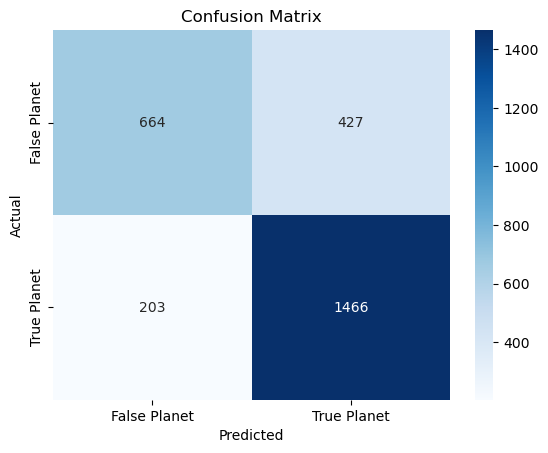

In [30]:
predicted = som.predict_kw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7768115942028986
F1-score: 0.8258903335217637
Precision: 0.7817014446227929
Recall: 0.8753744757339724
cm:  [[ 683  408]
 [ 208 1461]]


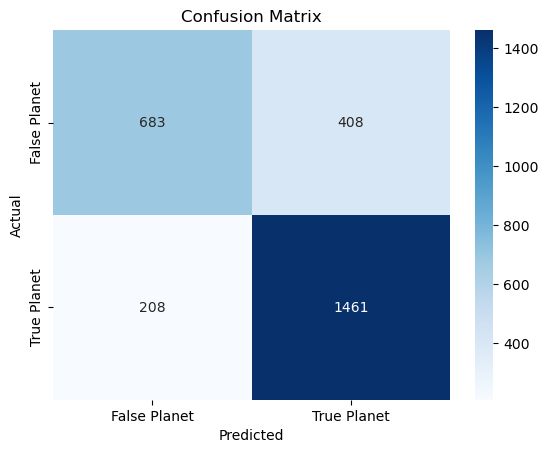

In [31]:
predicted = som.predict_kcw(X_train, y_train, X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)

Accuracy: 0.7829710144927536
F1-score: 0.8316942961506041
Precision: 0.783068783068783
Recall: 0.8867585380467345
cm:  [[ 681  410]
 [ 189 1480]]


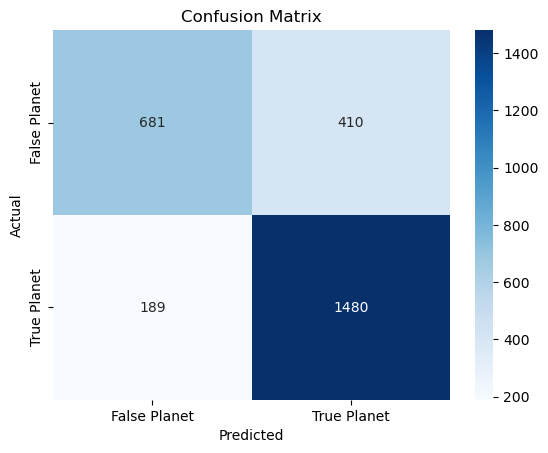

In [32]:
predicted = som.predict_knn(X_test, K=None)

cm = confusion_matrix(y_test, predicted)
print('Accuracy:', accuracy_score(y_test, predicted))
print('F1-score:', f1_score(y_test, predicted))
print('Precision:', precision_score(y_test, predicted))
print('Recall:', recall_score(y_test, predicted))
print("cm: ", cm)
plot_confusion_matrix(cm=cm)